# <font style="color:blue">Load Image Folder in DataLoader</font>

Till now, we have experimented with datasets available with the PyTorch Torchvision library.\

In this notebook, we will see how to load images from a folder.

Data available in torchvision-dataset are preprocessed images. But in the real world, we have to do it on our own. 

To illustrate a few preprocessing, we have chosen the [10 Monkey Species](https://www.kaggle.com/slothkong/10-monkey-species) dataset from Kaggle. You can download data from [here](https://www.kaggle.com/slothkong/10-monkey-species/download). You need to extract data. We have already uploaded the extracted data in the lab.

**Label mapping:**

| Label | Monkey Species |
| --- | --- |
| n0 | alouatta_palliata |
| n1 | erythrocebus_patas |
| n2 | cacajao_calvus |
| n3 | macaca_fuscata |  
| n4 | cebuella_pygmea |
| n5 | cebus_capucinus |
| n6 | mico_argentatus |
| n7 | saimiri_sciureus | 
| n8 | aotus_nigriceps |
| n9 | trachypithecus_johnii |


**Extracted Folder structure:**

```
10-monkey-species
├── training
│   └── training
│       ├── n0
│       ├── n1
│       ├── n2
│       ├── n3
│       ├── n4
│       ├── n5
│       ├── n6
│       ├── n7
│       ├── n8
│       └── n9
└── validation
    └── validation
        ├── n0
        ├── n1
        ├── n2
        ├── n3
        ├── n4
        ├── n5
        ├── n6
        ├── n7
        ├── n8
        └── n9

```

`10-monkey-species/training/training` has `n0-n10` folder; each folder has images of the corresponding class. Similarly, `10-monkey-species/validation/validation` has `n0-n10` folder.


**PyTorch has inbuilt functionality (`torchvision.datasets.ImageFolder` class) to load such structured image folder:**

```
torchvision.datasets.ImageFolder(root, transform=None, target_transform=None, loader=<function default_loader>, is_valid_file=None)
```

This is a generic data loader where the images are arranged in this way:

```
root/n0/xxx.png
root/n0/xxy.jpg
root/n0/xxz.png

root/n1/123.jpg
root/n1/nsdf3.png
root/n1/asd932_.png

    :
    :
    
root/n9/1b23.jpg
root/n9/nsasdf3.png
root/n9/as2wdd932_.png
    
```

Parameters:

- `root` (string) – Root directory path.

- `transform` (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop

- `target_transform` (callable, optional) – A function/transform that takes in the target and transforms it.

- `loader` (callable, optional) – A function to load an image given its path.

- `is_valid_file` – A function that takes path of an Image file and check if the file is a valid file (used to check of corrupt files)

Find more details [here](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder).

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import os
import sys

import numpy as np
import torch

from torchvision import datasets, transforms

# <font style="color:blue">1. Explore Training Data</font>

## <font style="color:green">1.1 Load Data</font>

In [4]:
# Load training data

train_root = "../resource/lib/publicdata/images/10-monkey-species/training/training"

train_data = datasets.ImageFolder(root=train_root)

## <font style="color:green">1.2 Explore Data</font>

### <font style="color:green">Get Classes</font>

In [5]:
# classes

train_data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

### <font style="color:green">Class to Index Mapping</font>

In [6]:
# Class to index mappings

train_data.class_to_idx

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

### <font style="color:green">Data Length</font>

In [7]:
# data length

train_data.__len__()

1097

### <font style="color:green">Get Image and Target</font>

PIL image size: (500, 331), target: 0


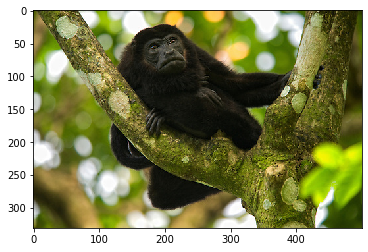

In [8]:
# get image and target

img, target = train_data.__getitem__(5)

print('PIL image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

**Note: In PIL image `size` attribute gives `width x heigh`**

image size: (400, 400), target: 4


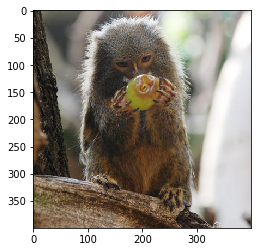

In [9]:
# get image and target
img, target = train_data.__getitem__(500)

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

**We can see that different images have different sizes. For training, we need fixed-size images. So we can not use these images as it is for training. We can use `torchvision.transforms.Resize` to resize images.**

# <font style="color:blue">2. Dataset with Preprocessing</font>

**Let's resized training data to `224 x 224`.**


In [10]:
# transform=transforms.Resize(224, 224)
train_data = datasets.ImageFolder(root=train_root, transform=transforms.Resize((224, 224)))


image size: (224, 224), target: 0


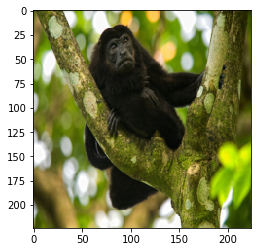

In [11]:
img, target = train_data.__getitem__(5)

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

image size: (224, 224), target: 4


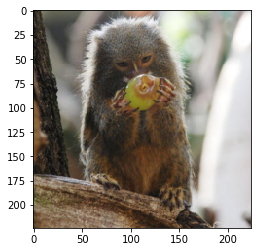

In [12]:
img, target = train_data.__getitem__(500)

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

**We can see that directly resizing to `224 x 224` is distorting the image because aspect ratio (`width:height`) is not taken care of by this way of resizing.**

If we give integer instead of a tuple as an argument to `transforms.resize`, it will resize lower pixel value to given integer value, and higher pixel value will be such that it will maintain aspect ratio. 

**Let's have a look.**

image size: (338, 224), target: 0


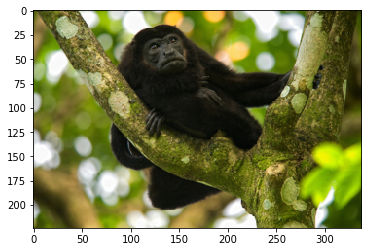

In [13]:
train_data = datasets.ImageFolder(root=train_root, transform=transforms.Resize(224))

img, target = train_data.__getitem__(5)

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

**We can see height has a lower value, which resized to 224.**

# <font style="color:blue">3. Dataloader with ImageFolder Dataset</font>

Suppose we need `224 x 224` sized images. Generally, the image of interest uses to be at the center of the big image. So we can use the following transform:

```
transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
    ])
```

Let's write down `get_data` method, which will return the training and validation data loader.

In [14]:
def get_data(batch_size, data_root, num_workers=4):
    
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    ])
    
    # train dataloader
    
    train_data_path = os.path.join(data_root, 'training', 'training')
    
    train_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(root=train_data_path, transform=preprocess),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    # test dataloader
    
    test_data_path = os.path.join(data_root, 'validation', 'validation')
    
    test_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(root=test_data_path, transform=preprocess),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, test_loader

### <font style="color:green">Plot few Images</font>

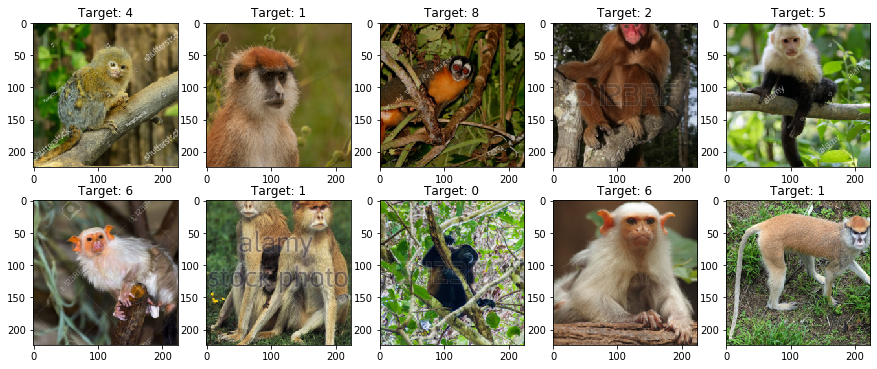

In [15]:
data_root = "../resource/lib/publicdata/images/10-monkey-species"

train_loader, test_loader = get_data(10, data_root)

plt.rcParams["figure.figsize"] = (15, 6)
plt.figure
for images, labels in train_loader:
    for i in range(len(labels)):
        plt.subplot(2, 5, i+1)
        img = transforms.functional.to_pil_image(images[i])
        plt.imshow(img)
        plt.gca().set_title('Target: {0}'.format(labels[i]))
    plt.show()
    break
    